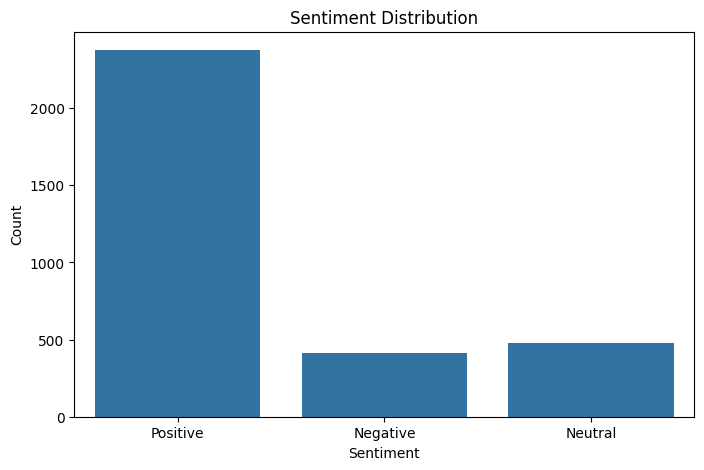

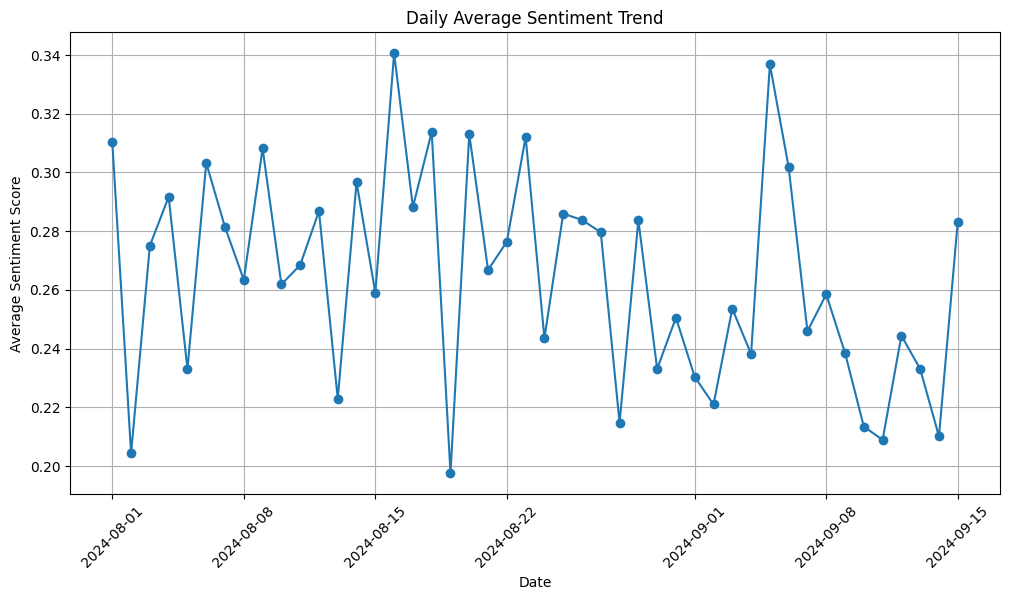

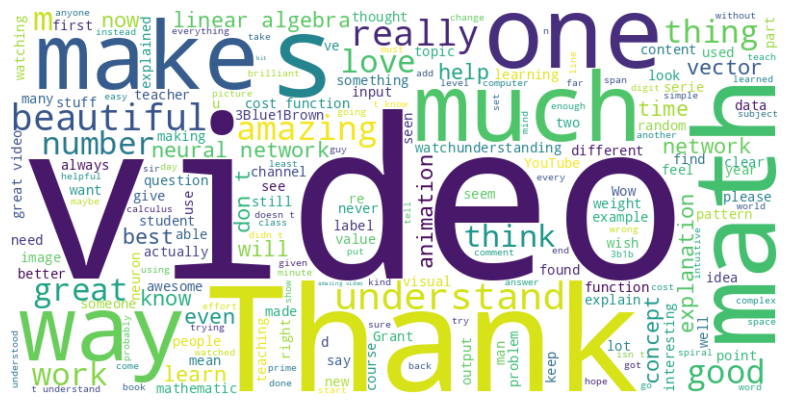

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

# Load the dataset
file_path = '/content/fds dst.xlsx'  # Update this to the correct path if needed
df = pd.read_excel(file_path)

# Rename columns for ease of use
df.columns = ['Srial', 'Platform', 'Comments', 'Label', 'Random Date']

# Function to calculate sentiment
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

# Apply sentiment analysis
df['sentiment_score'] = df['Comments'].apply(get_sentiment)

# Categorize sentiment
df['sentiment_category'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_category', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
print()
# Convert 'Random Date' to datetime format, specifying format to avoid warnings
df['Random Date'] = pd.to_datetime(df['Random Date'], format='%d-%m-%Y', errors='coerce')

# Drop rows with invalid dates, if any, and set 'Random Date' as the index
df.dropna(subset=['Random Date'], inplace=True)
df.set_index('Random Date', inplace=True)

# Resample and calculate mean sentiment score by day
daily_sentiment = df.resample('D').mean(numeric_only=True)

# Plot daily sentiment trend
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment.index, daily_sentiment['sentiment_score'], marker='o')
plt.title('Daily Average Sentiment Trend')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid()
plt.show()
print()

# Combine all comments for word cloud
all_comments = ' '.join(df['Comments'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Total Comments: 3271
Engagement Rate: 327.10%
                                                      Comments  polarity
Random Date                                                             
2024-08-09   He truly is very good at what he does   You ca...  0.770000
2024-08-04   Being brilliant at maths is one thing. Being b...  0.625000
2024-09-15   You honestly bring me near to tears because I ...  0.097143
2024-08-10   All these years of doing math and I never saw ...  0.333333
2024-08-29   Those graphics are really getting exceptionall...  0.533333
...                                                        ...       ...
2024-09-14   I am currently researching for automatic diffe... -0.097500
2024-08-06   interesting how network confidence is a proble...  0.500000
2024-08-13   I cannot access MNIST database. Access is forb...  0.000000
2024-08-24   Thank you for all the amazing videos  \nOne li...  0.201786
2024-09-08   So, if we were to make a network similar to bi... -0.066667

[327

<ipython-input-43-05f1c80293f9>:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, _ = pearsonr(df['polarity'], df['engagement_rate'])


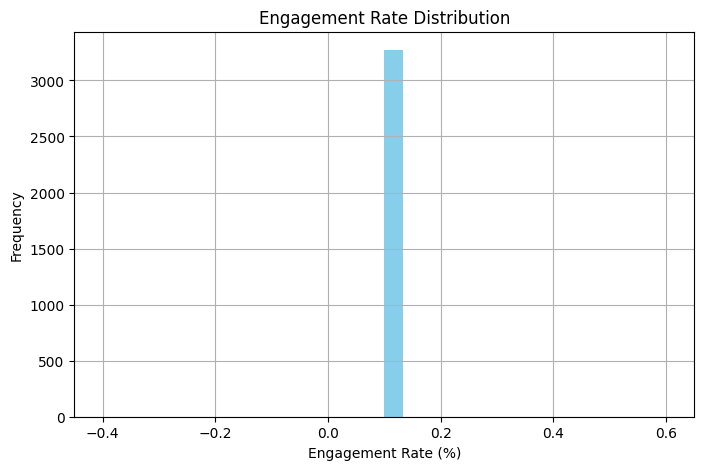

engagement_category
Low    3271
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from scipy.stats import pearsonr

# Load the dataset


# Function to calculate sentiment
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

# Apply sentiment analysis
df['polarity'] = df['Comments'].apply(get_sentiment)

# Set the number of followers (adjust as necessary)
followers = 1000  # Static followers count

# Calculate engagement (each comment counts as one engagement)
df['engagement'] = 1  # Each comment is counted as one engagement

# Calculate total engagement
total_engagement = df['engagement'].sum()

# Calculate engagement rate as a percentage
engagement_rate = (total_engagement / followers) * 100
print(f'Total Comments: {total_engagement}')
print(f'Engagement Rate: {engagement_rate:.2f}%')

# Display comments and their sentiment polarity
print(df[['Comments', 'polarity']])

# Calculate correlation between engagement rate and polarity
# Adding engagement_rate as a column to perform the correlation operation
df['engagement_rate'] = (df['engagement'] / followers) * 100
correlation, _ = pearsonr(df['polarity'], df['engagement_rate'])
print(f'Correlation between Engagement Rate and Polarity: {correlation:.2f}')

# Check the summary statistics for engagement rate
print(df['engagement_rate'].describe())

# Visualize the engagement rate distribution
plt.figure(figsize=(8, 5))
df['engagement_rate'].hist(bins=30, color='skyblue')
plt.title('Engagement Rate Distribution')
plt.xlabel('Engagement Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Create bins based on quantiles, ensuring unique bin edges
bins = [0, df['engagement_rate'].quantile(0.25), df['engagement_rate'].quantile(0.5),
        df['engagement_rate'].quantile(0.75), df['engagement_rate'].max()]
bins = sorted(list(set(bins)))  # Convert to set to remove duplicates, then back to list and sort

labels = ['Low', 'Medium', 'High', 'Very High'][:len(bins) - 1]  # Adjust labels to match bins

# Use 'duplicates' parameter to drop any duplicate bin edges
df['engagement_category'] = pd.cut(df['engagement_rate'], bins=bins, labels=labels, duplicates='drop')
# Check the bin counts for engagement categories
print(df['engagement_category'].value_counts())


In [ ]:
engagement_summary = df.groupby('engagement_category').agg({
'polarity': ['mean', 'count'],
'Comments': 'count' # If you want to see how many comments are in each category
})
print(engagement_summary)

                     polarity       Comments
                         mean count    count
engagement_category                         
Low                  0.264035  3271     3271


<ipython-input-44-45b245eab360>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engagement_summary = df.groupby('engagement_category').agg({


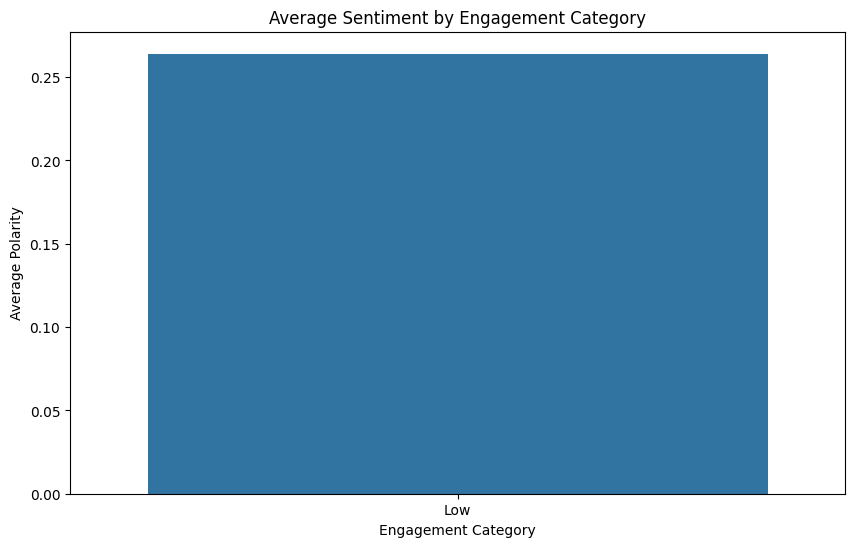

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=engagement_summary.index,
y=engagement_summary['polarity']['mean'])
plt.title('Average Sentiment by Engagement Category')
plt.xlabel('Engagement Category')
plt.ylabel('Average Polarity')
plt.show()

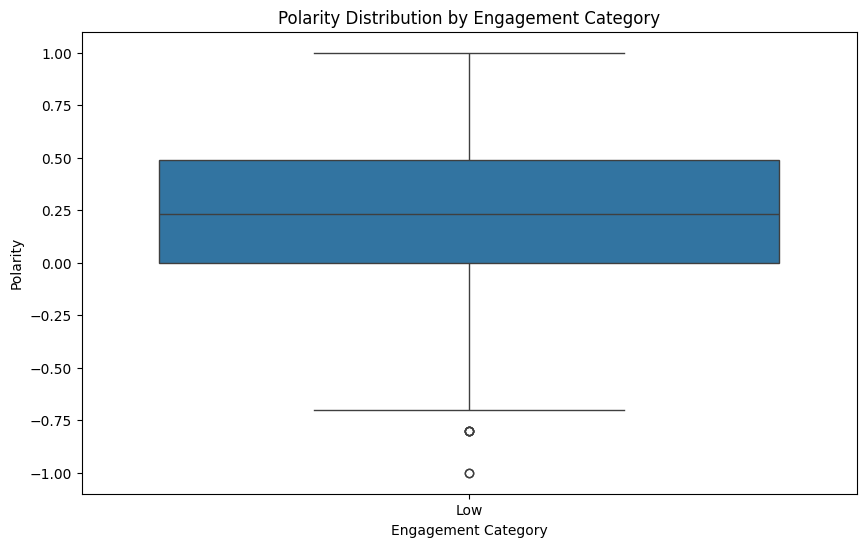

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='engagement_category', y='polarity', data=df)
plt.title('Polarity Distribution by Engagement Category')
plt.xlabel('Engagement Category')
plt.ylabel('Polarity')
plt.show()

<ipython-input-49-b19d1cde56be>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_summary = df.groupby(['engagement_category']) \


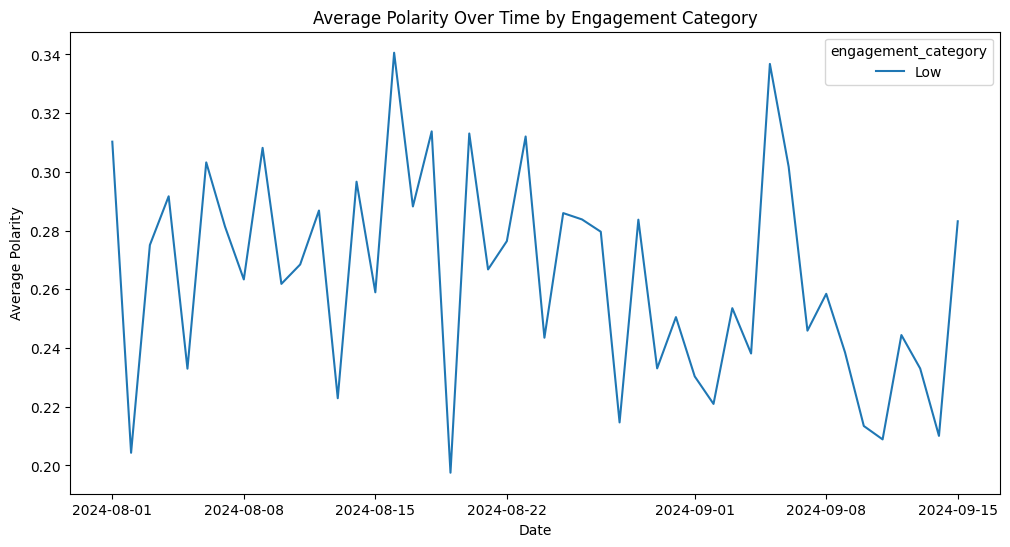

In [ ]:
daily_summary = df.groupby(['engagement_category']) \
                  .resample('D') \
                  .agg({'polarity': 'mean'}) \
                  .reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_summary, x='Random Date', y='polarity',
hue='engagement_category')
plt.title('Average Polarity Over Time by Engagement Category')
plt.xlabel('Date')
plt.ylabel('Average Polarity')
plt.show()

In [ ]:
# Display unique platforms
print(df['Platform'].unique())

['Youtube' 'X' 'Instagram' 'Reddit']


In [ ]:
platform_summary = df.groupby('Platform').agg({
'engagement_rate': 'mean',
'polarity': 'mean',
'Comments': 'count' # Count of comments for each platform
}).reset_index()
print(platform_summary)

    Platform  engagement_rate  polarity  Comments
0  Instagram              0.1  0.292262        44
1     Reddit              0.1  0.184375         2
2          X              0.1  0.329170        36
3    Youtube              0.1  0.262961      3189


<ipython-input-52-23ef8b82f5a1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='engagement_rate', data=platform_summary,
<ipython-input-52-23ef8b82f5a1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='polarity', data=platform_summary, ax=ax[1],


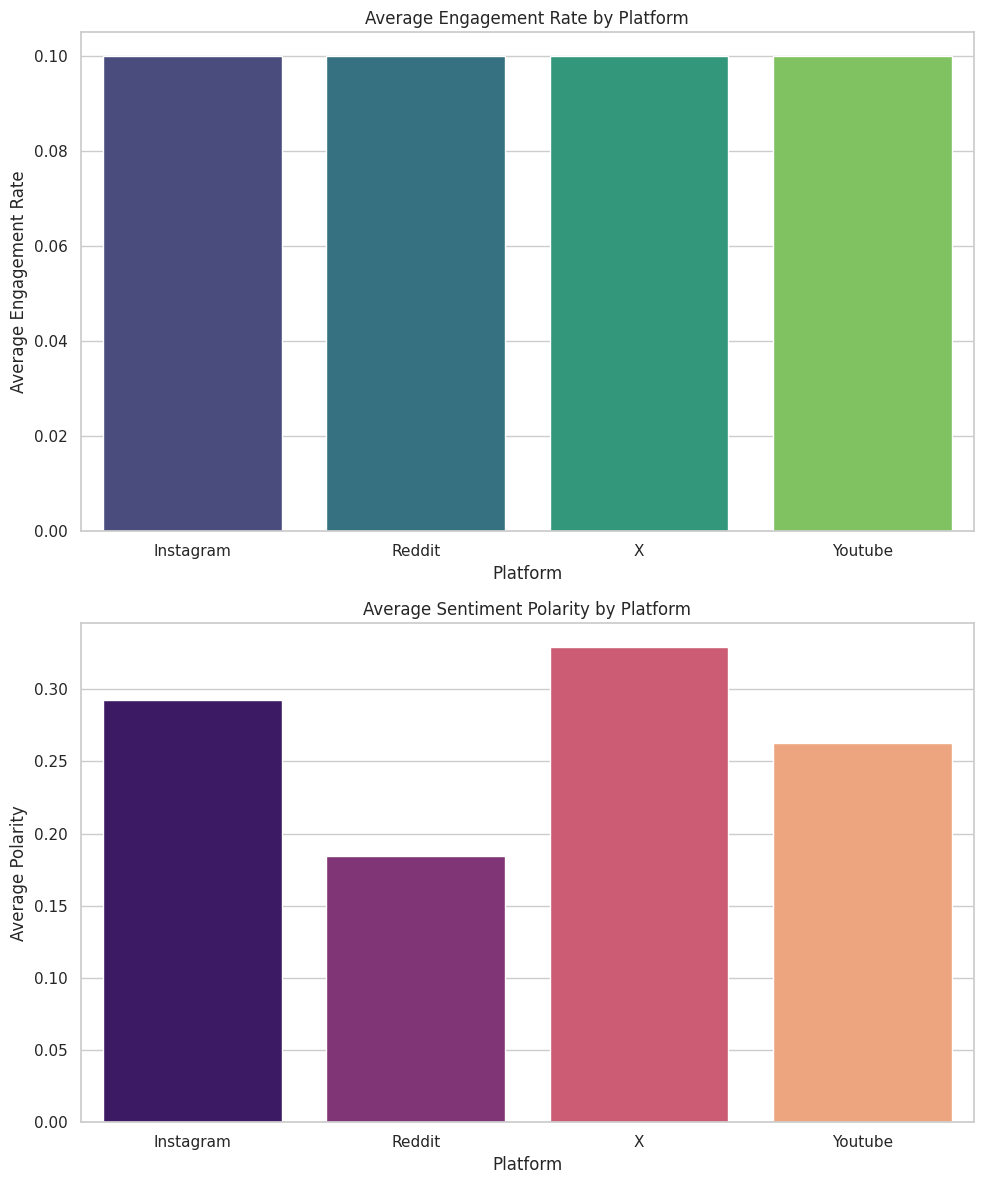

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the aesthetics for the plots
sns.set(style="whitegrid")
# Create a figure with subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 12))
# Bar plot for average engagement rate
sns.barplot(x='Platform', y='engagement_rate', data=platform_summary,
ax=ax[0], palette='viridis')
ax[0].set_title('Average Engagement Rate by Platform')
ax[0].set_xlabel('Platform')
ax[0].set_ylabel('Average Engagement Rate')
# Bar plot for average sentiment polarity
sns.barplot(x='Platform', y='polarity', data=platform_summary, ax=ax[1],
palette='magma')
ax[1].set_title('Average Sentiment Polarity by Platform')
ax[1].set_xlabel('Platform')
ax[1].set_ylabel('Average Polarity')
plt.tight_layout()
plt.show()

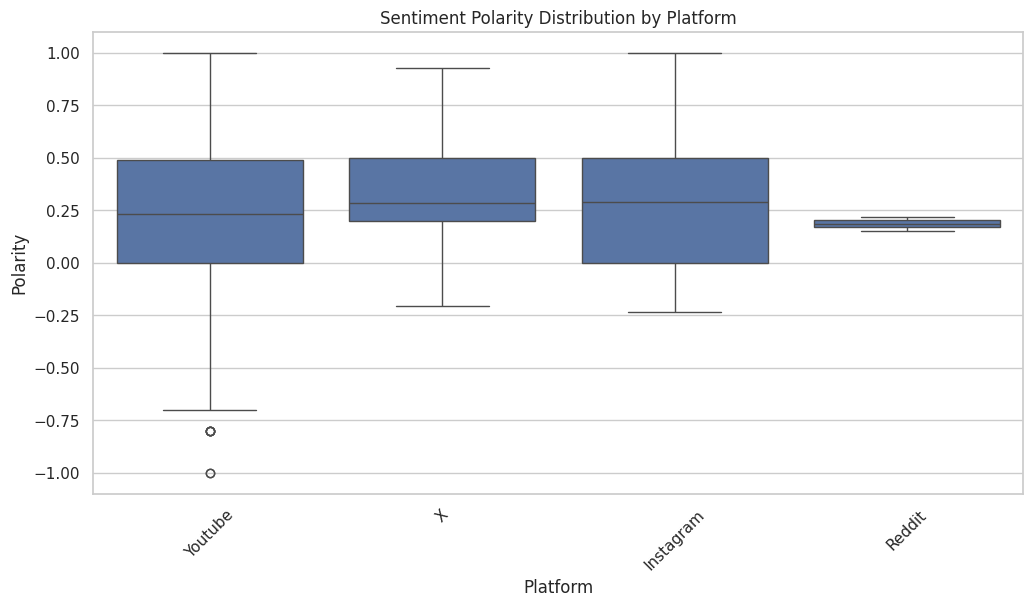

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Platform', y='polarity', data=df)
plt.title('Sentiment Polarity Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Polarity')
plt.xticks(rotation=45)
plt.show()

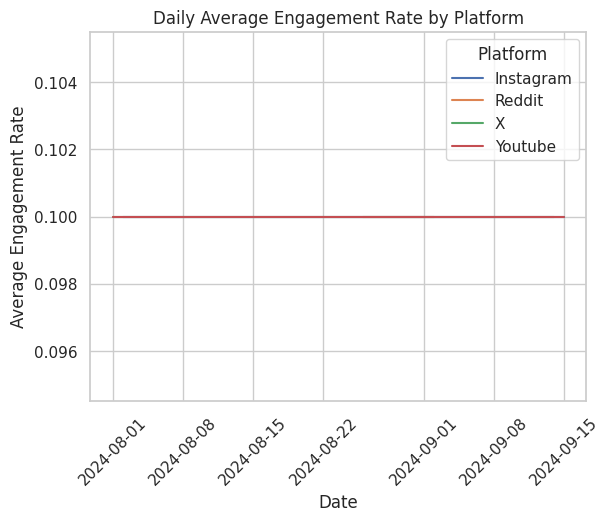

In [ ]:
# Resample to get daily averages
daily_summary = df.groupby(['Platform']).resample('D')['engagement_rate', 'polarity'].mean().reset_index()
sns.lineplot(data=daily_summary, x='Random Date', y='engagement_rate',
hue='Platform')
plt.title('Daily Average Engagement Rate by Platform')
plt.xlabel('Date')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.show()

In [ ]:
for platform in df['Platform'].unique():
  subset = df[df['Platform'] == platform]
  correlation, _ = pearsonr(subset['engagement_rate'], subset['polarity'])
  print(f'Correlation for {platform}: {correlation:.2f}')

Correlation for Youtube: nan
Correlation for X: nan
Correlation for Instagram: nan
Correlation for Reddit: nan


<ipython-input-62-40243e2ed8f2>:3: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, _ = pearsonr(subset['engagement_rate'], subset['polarity'])


In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# Example for a specific platform
platform_comments = df[df['Platform'] == 'YouTube']['Comments'].tolist()
all_words = ' '.join(platform_comments).lower().split()
filtered_words = [word for word in all_words if word not in stop_words]
word_counts = Counter(filtered_words)
print(word_counts) # Display 10 most common words

Counter()
